<a href="https://colab.research.google.com/github/SetZah/XRD-peak-FWM/blob/main/XRD_Peak.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

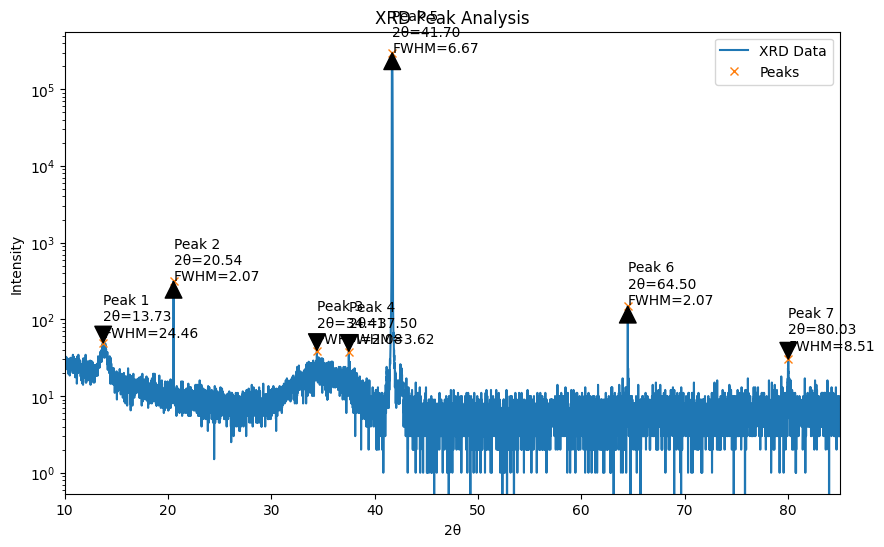

Peak 1: 2θ = 13.73, FWHM = 24.46
Peak 2: 2θ = 20.54, FWHM = 2.07
Peak 3: 2θ = 34.41, FWHM = 2.08
Peak 4: 2θ = 37.50, FWHM = 3.62
Peak 5: 2θ = 41.70, FWHM = 6.67
Peak 6: 2θ = 64.50, FWHM = 2.07
Peak 7: 2θ = 80.03, FWHM = 8.51


In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks, peak_widths

# Load the dataset
file_path = '/content/XRD-data.txt'  # Replace with your actual file path

# Read the data, replacing commas with dots and converting to float
data = pd.read_csv(file_path, delim_whitespace=True, header=None, names=['2theta', 'intensity'])
data['2theta'] = data['2theta'].str.replace(',', '.').astype(float)
data['intensity'] = data['intensity'].str.replace(',', '.').astype(float)

# Filter data to include only values where 2theta <= 90
data_filtered = data[data['2theta'] <= 90]
theta = data_filtered['2theta']
intensity = data_filtered['intensity']

# Find peaks with prominence and other parameters
peaks, _ = find_peaks(intensity, prominence=27, height=10, distance=10)  # Adjust these values as needed

# Calculate FWHM for each peak
results_half = peak_widths(intensity, peaks, rel_height=0.5)

# Plot the data and the identified peaks
plt.figure(figsize=(10, 6))
plt.plot(theta, intensity, label='XRD Data')
plt.plot(theta[peaks], intensity[peaks], "x", label='Peaks')
plt.hlines(*results_half[1:], color="C2")

# Set x-axis limit to 90
plt.xlim([10, 85])

# Set y-axis to logarithmic scale
plt.yscale('log')

# Annotate the FWHM and peak positions
for i, peak in enumerate(peaks):
    plt.annotate(f'Peak {i+1}\n2θ={theta[peak]:.2f}\nFWHM={results_half[0][i]:.2f}',
                 xy=(theta[peak], intensity[peak]),
                 xytext=(theta[peak], intensity[peak]+10),
                 arrowprops=dict(facecolor='black', shrink=0.05))

plt.xlabel('2θ')
plt.ylabel('Intensity')
plt.title('XRD Peak Analysis')
plt.legend()
plt.show()

# Print the peak positions and FWHM values
for i, peak in enumerate(peaks):
    print(f'Peak {i+1}: 2θ = {theta[peak]:.2f}, FWHM = {results_half[0][i]:.2f}')
